## Dependencies

### Library Installation (if needed)

In [1]:
#! pip install -qUr requirements.txt

In [2]:
from methods.screener_methods import *
from tqdm import tqdm
import pandas as pd

### Single import

,Ticker,Name,Signal,Recommendation Score,Value Score,Quality Score,P/E Score,ROA Score,PB Score,Leadership Score,Insider Buy Score,P/E,ROA%,Earnings pr. Share,Price to Book,Insider Buy%,Sector,Industry,Country,Owned
0,PNDORA.CO,Pandora A/S,Buy,1.97,1.64,0.33,0.84,1.0,-0.2,0.33,0.0,10.55,18.43,66.37,18.61,0.0,Consumer Cyclical,Luxury Goods,Denmark,True


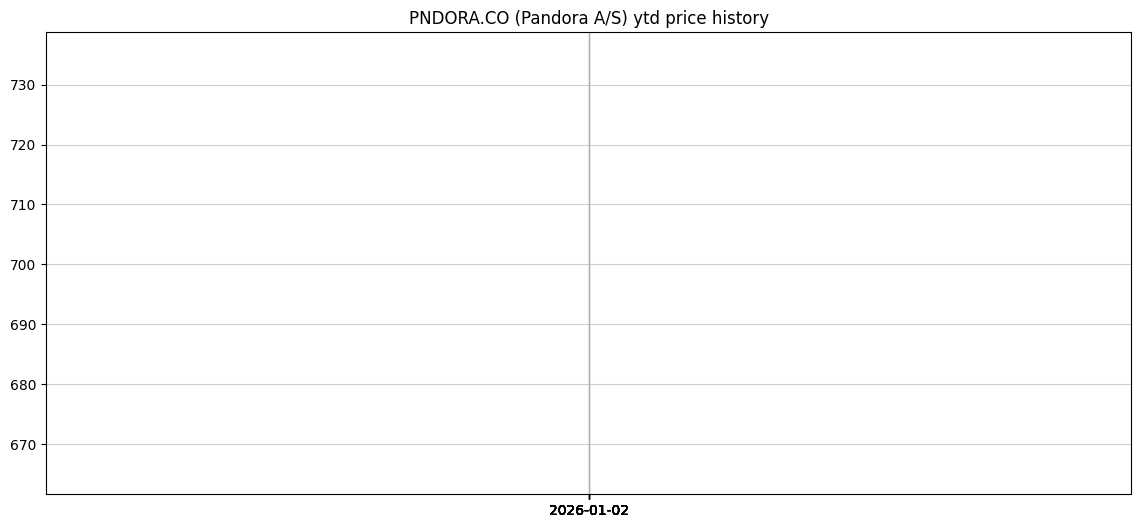

In [3]:
symbol = "PNDORA.CO"
stock = Stock(symbol)
display(stock.summary())
stock.price_graph("ytd")


### Screener

In [4]:
symbol_list = input('Symbols eg. "simple", "filtered", "all", "danish":')

if symbol_list == "all":
    symbols = (
        pd.read_csv("../data/tickers/tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].to_list()
    )
elif symbol_list == "filtered":
    symbols = pd.read_csv("../data/tickers/screener_filtered_tickers.csv")["Ticker"].tolist()
elif symbol_list == "danish":
    symbols = pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist()
else:
    symbols = pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].tolist()
symbols = list(set(symbols))

In [5]:
import sys, io
df = pd.DataFrame()
for symbol in tqdm(symbols, smoothing=0):
    old_stderr = sys.stderr
    sys.stderr = io.StringIO()
    try:
        df = pd.concat([df, Stock(symbol).summary()])
    except Exception:
        pass
    finally:
        sys.stderr = old_stderr
df = df.sort_values(by="Recommendation Score", ascending=False)
display(df)
if symbol_list == "simple":
    df.to_csv("../data/screener_results/simple_screener_results.csv", index=False)
elif symbol_list == "danish":
    df.to_csv("../data/screener_results/danish_screener_results.csv", index=False)
elif symbol_list == "filtered" or symbol_list == "all":   
    df.to_csv("../data/screener_results/screener_results.csv", index=False)
    df["Ticker"].to_csv("../data/tickers/screener_filtered_tickers.csv", index=False)

100%|██████████| 69/69 [00:42<00:00,  1.61it/s]


,Ticker,Name,Signal,Recommendation Score,Value Score,Quality Score,P/E Score,ROA Score,PB Score,Leadership Score,Insider Buy Score,P/E,ROA%,Earnings pr. Share,Price to Book,Insider Buy%,Sector,Industry,Country,Owned
0,BAVA.CO,Bavarian Nordic A/S,Buy,2.52,2.09,0.43,1.04,0.92,0.13,0.43,0.0,6.23,7.78,30.71,1.14,0.0,Healthcare,Biotechnology,Denmark,False
0,ZEAL.CO,Zealand Pharma A/S,Buy,2.04,2.02,0.02,1.07,1.00,-0.06,0.02,0.0,5.14,33.45,91.27,2.17,0.0,Healthcare,Biotechnology,Denmark,True
0,TRMD,TORM plc,Buy,1.99,1.81,0.19,1.01,0.65,0.15,0.19,0.0,7.17,5.99,2.73,0.89,0.0,Energy,Oil & Gas Midstream,United Kingdom,True
0,PNDORA.CO,Pandora A/S,Buy,1.97,1.64,0.33,0.84,1.00,-0.20,0.33,0.0,10.55,18.43,66.37,18.61,0.0,Consumer Cyclical,Luxury Goods,Denmark,True
0,HLUN-A.CO,H. Lundbeck A/S A,Buy,1.96,1.93,0.03,0.90,0.95,0.08,0.03,0.0,9.65,8.28,3.84,1.46,0.0,Healthcare,Drug Manufacturers - Specialty & Generic,Denmark,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,DSV.CO,DSV A/S,Sell,-0.85,-1.11,0.26,-1.17,0.24,-0.18,0.26,0.0,39.80,4.85,40.05,3.27,0.0,Industrials,Integrated Freight & Logistics,Denmark,False
0,ALMB.CO,Alm. Brand A/S,Sell,-0.93,-1.16,0.23,-0.83,-0.26,-0.07,0.23,0.0,26.66,3.76,0.70,2.25,0.0,Financial Services,Insurance - Diversified,Denmark,False
0,SAAB-B.ST,SAAB AB ser. B,Sell,-1.34,-1.55,0.22,-1.20,-0.16,-0.20,0.22,0.0,58.09,3.99,9.62,7.34,0.0,Industrials,Aerospace & Defense,Sweden,False
0,SOLAR-B.CO,Solar B A/S,Sell,-1.55,-1.81,0.26,-1.20,-0.76,0.15,0.26,0.0,57.91,2.15,3.54,0.87,0.0,Technology,Electronics & Computer Distribution,Denmark,False
